# Data recording sheet

| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | July 20, 2020 |
| Location | Locomotion Laboratory  |
| Subject | SX |
| Calibration factor | 234 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

---
## Results

| Environmental conditions | |
|---|---|
| Temp. (C) | 21 |
| Humidity (%) | 48 |
| Pressure (mmHg) | 638 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) | 33 |
| Mass (lb/kg) | 172 / 78 |
| Height (ft/m) | 5'10" / 1.78 |

In [ ]:
import numpy as np

mass = 172
listPerc = [0.06, 0.12, 0.18]
listRes = np.array(listPerc)*mass
listRes

array([10.32, 20.64, 30.96])

### Pmax Test

| Condition | Trial | Hanging Weight (Lbs) | Power  (W) | Cadence (RPM) | 
| --- | --- | --- | --- | --- |
| 1 | 1 | 12.5  | 1028 | 166 |
| 1 | 2 | 22.5  | 1230 | 115 |
| 1 | 3 | 32.5  | 1025 | 70 |

Predicted maximal power output is 1230.0000000000002
Predicted optimal hanging weight is 22.5


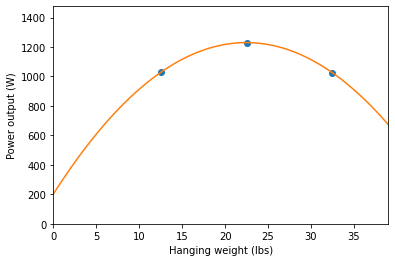

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set data
x = [12.5, 22.5, 32.5]
y = [1028, 1230, 1025]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)

## Results
* Record directly to dataframe

In [7]:
# create data table
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([
                              [1, 0, 1, 12.5, 1028, 166], 
                              [1, 0, 2, 22.5, 1230, 115], 
                              [1, 0, 3, 32.5, 1025, 70],
                              [1, 3, 1, 22.5, 1392, 116], 
                              [1, 1, 1, 22.5, 1309, 114], 
                              [1, 2, 1, 22.5, 1332, 114],
                              [1, 1, 2, 22.5, 1366, 117],
                              [1, 2, 2, 22.5, 1320, 111],
                              [1, 3, 2, 22.5, 1428, 119],
                              [1, 2, 3, 22.5, 1297, 117],
                              [1, 1, 3, 22.5, 1358, 115],
                              [1, 3, 3, 22.5, 1407, 120]
                              ]),
                    columns=['subject', 'condition', 'trial', 'hanging weight', 'power', 'cadence'])
data

,subject,condition,trial,hanging weight,power,cadence
0,1.0,0.0,1.0,12.5,1028.0,166.0
1,1.0,0.0,2.0,22.5,1230.0,115.0
2,1.0,0.0,3.0,32.5,1025.0,70.0
3,1.0,3.0,1.0,22.5,1392.0,116.0
4,1.0,1.0,1.0,22.5,1309.0,114.0
5,1.0,2.0,1.0,22.5,1332.0,114.0
6,1.0,1.0,2.0,22.5,1366.0,117.0
7,1.0,2.0,2.0,22.5,1320.0,111.0
8,1.0,3.0,2.0,22.5,1428.0,119.0
9,1.0,2.0,3.0,22.5,1297.0,117.0


##Data Analysis
* Mean and SD power and cadence

In [8]:
# calculate condition mean
data.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
0.0,1094.333333,117.000000
1.0,1344.333333,115.333333
2.0,1316.333333,114.000000
3.0,1409.000000,118.333333


In [9]:
# calculate condition sd
data.groupby('condition')[['power','cadence']].std()

,power,cadence
condition,,
0.0,117.500355,48.031240
1.0,30.859898,1.527525
2.0,17.785762,3.000000
3.0,18.083141,2.081666
